# Практическая работа №5. Библиотека Pandas. Визуальный анализ данных

## Комплексное задание №1. Применение основных методов для анализа данных

1. Скачайте этот блокнот к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература
- [**Блокнот с теорией**](https://colab.research.google.com/drive/1SLqmaYz4xEsxVV-LGwb3ityheBTzHJQu?usp=sharing)
- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с Вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [ ]:
%matplotlib inline
import pandas as pd
pd.__version__

'1.5.3'

Если вы увидели warning, не переживайте, всё хорошо.
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [ ]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values=' ?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [ ]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете?

In [ ]:
print("Количество строк:", df.shape[0])
print("Количество колонок:", df.shape[1])

Количество строк: 32561
Количество колонок: 15


3) Какие типы данных у элементов этого датасета?

In [ ]:
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object


4) Какие признаки имеют пропуски?

In [ ]:
print(df.columns[df.isnull().any()])

Index(['workclass', 'occupation', 'native.country'], dtype='object')


5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ:

1) по личным причинам респонденты не хотят предоставлять информацию о работе, профессии или страны происхождения.

2) возможны ошибки при сборе данных (оппечатки или проблемы при заполнении анкеты)

3) респонденты могли быть безработными, и поэтому нет информации о работе

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [ ]:
workclass_counts = df['workclass'].value_counts()
print(workclass_counts)

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


7) Какой средний возраст женщин и мужчин?

In [ ]:
avg_age_female = df[df['sex'] == ' Female']['age'].mean()
print("Средний возраст женщин:", avg_age_female)

avg_age_male = df[df['sex'] == ' Male']['age'].mean()
print("Средний возраст мужчин:", avg_age_male)


Средний возраст женщин: 36.85823043357163
Средний возраст мужчин: 39.43354749885268


8) Постройте гистограмму(bar) распределения образования людей (education)

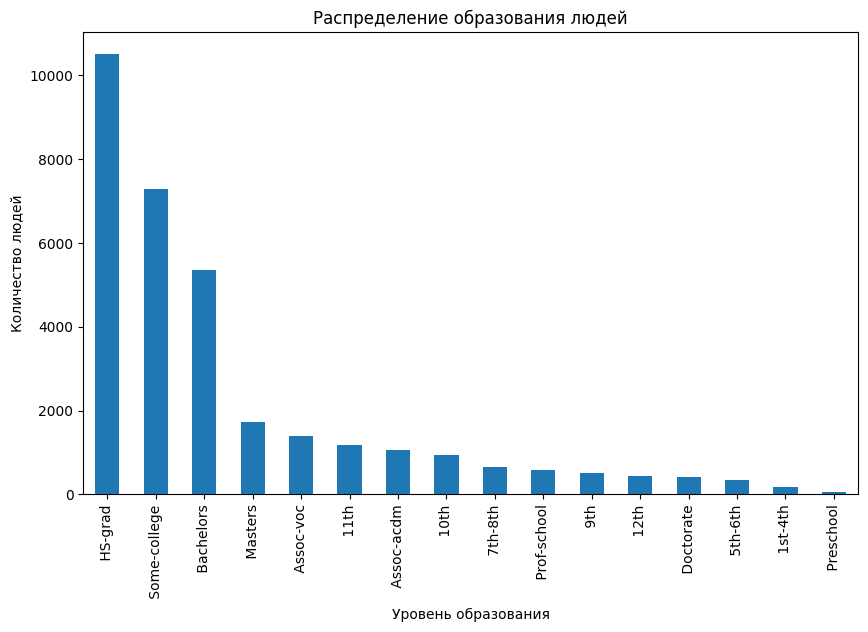

In [ ]:
import matplotlib.pyplot as plt


education_counts = df['education'].value_counts()

education_counts.plot.bar(figsize=(10, 6))
plt.xlabel('Уровень образования')
plt.ylabel('Количество людей')
plt.title('Распределение образования людей')
plt.show()

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак income) и тех, кто получает менее 50K в год?

In [ ]:
df_income_more = df[df['income'] == ' >50K']
df_income_less = df[df['income'] == ' <=50K']

avg_age_more = df_income_more['age'].mean()
std_age_more = df_income_more['age'].std()
avg_age_less = df_income_less['age'].mean()
std_age_less = df_income_less['age'].std()

print("Средний возраст тех, кто получает более 50K в год:", avg_age_more)
print("Среднеквадратичное отклонение возраста тех, кто получает более 50K в год:", std_age_more)
print("Средний возраст тех, кто получает менее 50K в год:", avg_age_less)
print("Среднеквадратичное отклонение возраста тех, кто получает менее 50K в год:", std_age_less)

Средний возраст тех, кто получает более 50K в год: 44.24984058155847
Среднеквадратичное отклонение возраста тех, кто получает более 50K в год: 10.519027719851826
Средний возраст тех, кто получает менее 50K в год: 36.78373786407767
Среднеквадратичное отклонение возраста тех, кто получает менее 50K в год: 14.02008849082488


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [ ]:
df_income_more = df[df['income'] == ' >50K']

education_counts = df_income_more['education'].value_counts()

has_no_higher_education = any(index not in [' Bachelors', ' Prof-school', ' Assoc-acdm', ' Assoc-voc', ' Masters', ' Doctorate'] for index, value in education_counts.items())

if has_no_higher_education:
    print("Не все люди, которые получают больше 50k, имеют как минимум высшее образование.")
else:
    print("Все люди, которые получают больше 50k, имеют как минимум высшее образование.")

Не все люди, которые получают больше 50k, имеют как минимум высшее образование.


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [ ]:
df_men = df[df['sex'] == ' Male']

married_men = df_men[df_men['marital.status'].str.startswith(' Married')]
single_men = df_men[~df_men['marital.status'].str.startswith(' Married')]

income_married = married_men['income'] == ' >50K'
income_single = single_men['income'] == ' >50K'

share_married = income_married.mean()
share_single = income_single.mean()

print(f"Доля зарабатывающих много среди женатых мужчин: {share_married}")
print(f"Доля зарабатывающих много среди холостых мужчин: {share_single}")

Доля зарабатывающих много среди женатых мужчин: 0.4405139945351156
Доля зарабатывающих много среди холостых мужчин: 0.08449509031397745


12) Постройте [сводную таблицу](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) для отображения зависимостей среднего времени работы (hours.per.week) с доходом (income) для каждой страны (native.country).  


> Пример фрагмента таблицы:



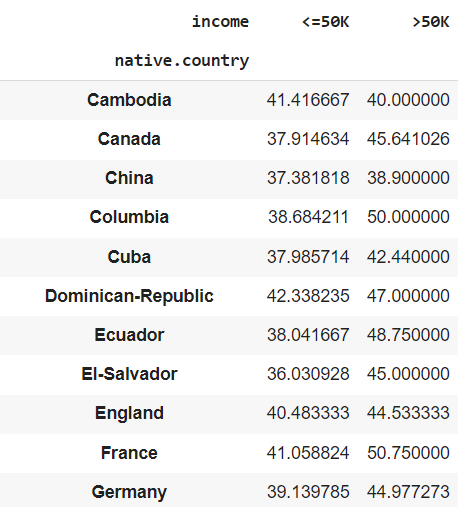

In [ ]:
pivot_table = pd.pivot_table(df, values='hours.per.week', index='native.country', columns='income', aggfunc='mean')

pivot_table.columns = ['income (<=50K)', ' (>50K)']

pivot_table.head(10)

,income (<=50K),(>50K)
native.country,,
Cambodia,41.416667,40.000000
Canada,37.914634,45.641026
China,37.381818,38.900000
Columbia,38.684211,50.000000
Cuba,37.985714,42.440000
Dominican-Republic,42.338235,47.000000
Ecuador,38.041667,48.750000
El-Salvador,36.030928,45.000000
England,40.483333,44.533333


13) Постройте сводную таблицу для сравнения уровня образования и разности между capital.gain и capital.loss по следующему алгоритму:&nbsp;  
1. Создайте вспомогательную таблицу (датафрейм) и добавьте в неё столбец "education" из целевой таблицы
2. Добавьте во вспомогательную таблицу ещё один столбец "capital.diff", значиниями которого будут являться разности столбцов capital.gain и capital.loss целевой таблицы
3. Удалите во вспомогательной таблице все строки, в которых значение столбца "capital.diff" равно нулю  
&nbsp; Подсказка:
```
summary_table = summary_table[summary_table['capital.diff'] != 0 ]
```
4. Для набора значений из столбца "capital.diff", необходимо сформировать 10 категорий (кластеров), это можно сделать с помощью математических функций, типа log, извлечение корня N-ой степени и округления, для последующего перехода к категориальным признакам.  
  * В нашем случае, можно воспользоваться методом [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) и равномерно разделить наш набор данных на целевое количество категорий
5. Добавьте во вспомогательную таблицу столбец "categories", и проинициализируйте его значениями категорий, которые возвращает метод pd.qcut()  
&nbsp; Пример:
```
summary_table['categories'] = pd.qcut(summary_table["capital.diff"], q = 10)

6. Постройте сводную таблицу с помощью метода pivot_table(),

Примерная структура таблицы (в качестве значений выводится количество людей, относящихся к той или иной группе):

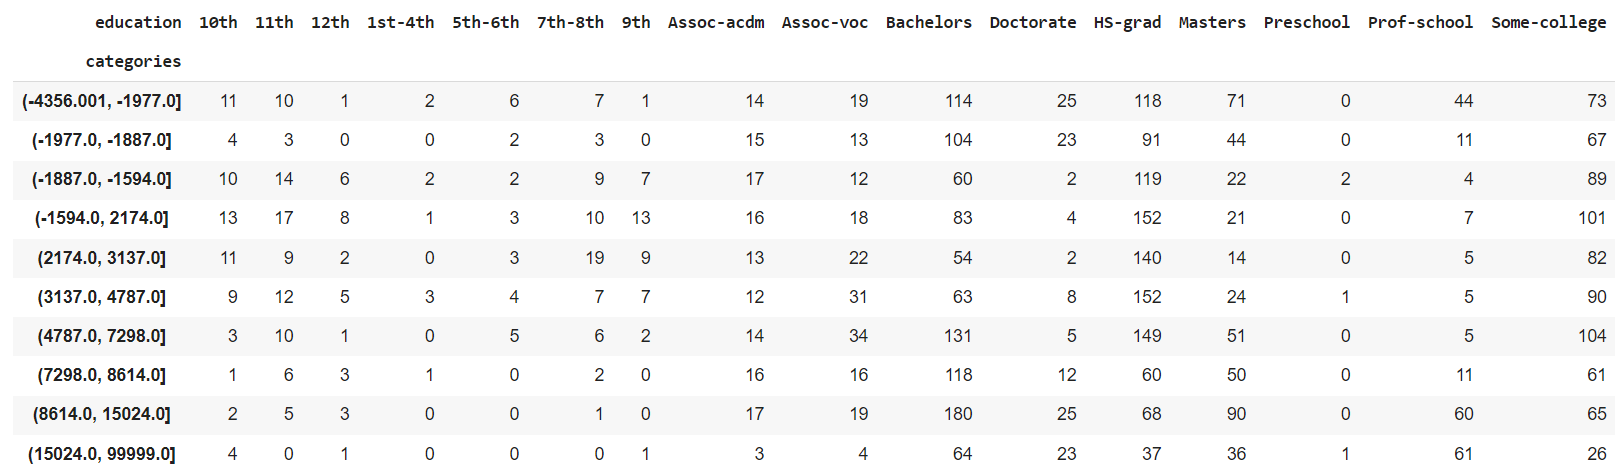

In [ ]:
summary_table = df[['education', 'capital.gain', 'capital.loss']].copy()

summary_table.loc[:, 'capital.diff'] = summary_table['capital.gain'] - summary_table['capital.loss']

summary_table = summary_table[summary_table['capital.diff'] != 0]

summary_table['categories'] = pd.qcut(summary_table['capital.diff'], q=10)

pivot_table = pd.crosstab(summary_table['categories'], summary_table['education'])

pivot_table.head(10)


education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
categories,,,,,,,,,,,,,,,,
"(-4356.001, -1977.0]",11,10,1,2,6,7,1,14,19,114,25,118,71,0,44,73
"(-1977.0, -1887.0]",4,3,0,0,2,3,0,15,13,104,23,91,44,0,11,67
"(-1887.0, -1594.0]",10,14,6,2,2,9,7,17,12,60,2,119,22,2,4,89
"(-1594.0, 2174.0]",13,17,8,1,3,10,13,16,18,83,4,152,21,0,7,101
"(2174.0, 3137.0]",11,9,2,0,3,19,9,13,22,54,2,140,14,0,5,82
"(3137.0, 4787.0]",9,12,5,3,4,7,7,12,31,63,8,152,24,1,5,90
"(4787.0, 7298.0]",3,10,1,0,5,6,2,14,34,131,5,149,51,0,5,104
"(7298.0, 8614.0]",1,6,3,1,0,2,0,16,16,118,12,60,50,0,11,61
"(8614.0, 15024.0]",2,5,3,0,0,1,0,17,19,180,25,68,90,0,60,65


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [ ]:
women_data = df[df['sex'] == ' Female']

women_income_by_country = women_data.groupby('native.country')['income'].apply(
    lambda x: (x == ' >50K').sum() / len(x))

women_income_by_country_sorted = women_income_by_country.sort_values(ascending=False)

women_income_by_country_sorted.head(10)

native.country
 Yugoslavia    0.333333
 Taiwan        0.266667
 Japan         0.250000
 France        0.250000
 Iran          0.250000
 China         0.238095
 Italy         0.238095
 Canada        0.230769
 Scotland      0.200000
 Greece        0.200000
Name: income, dtype: float64

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [ ]:
df['magic_salary'] = np.where(df['income'] == ' <=50K', np.random.randint(0, 51, len(df)), np.random.randint(51, 201, len(df)))

average_hourly_salary = df.groupby('education')['magic_salary'].mean() / (52 * df.groupby('education')['hours.per.week'].mean())

average_hourly_salary.sort_values(ascending=False)

education
 Doctorate       0.041892
 Prof-school     0.040405
 Masters         0.035132
 Bachelors       0.030486
 Assoc-acdm      0.023783
 Assoc-voc       0.023282
 Some-college    0.021998
 HS-grad         0.019526
 12th            0.017859
 11th            0.017183
 10th            0.016165
 9th             0.015531
 7th-8th         0.015218
 5th-6th         0.014695
 1st-4th         0.013309
 Preschool       0.011771
dtype: float64

## Комплексное задание №2. Визуальный анализ данных. Часть 1

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

В этом задании Вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):

*   instant: record index
*   dteday : date
*   season : season (1:springer, 2:summer, 3:fall, 4:winter)
*   yr : year (0: 2011, 1:2012)
*   mnth : month ( 1 to 12)
*   hr : hour (0 to 23)
*   holiday : weather day is holiday or not
*   weekday : day of the week
*   workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
*   weathersit :

    1: Clear, Few clouds, Partly cloudy, Partly cloudy

    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
*   temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
*   atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
*   hum: Normalized humidity. The values are divided to 100 (max)
*   windspeed: Normalized wind speed. The values are divided to 67 (max)
*   casual: count of casual users
*   registered: count of registered users

Загрузите самостоятельно(!), с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [4]:
!pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo


df = fetch_ucirepo(id=275).data.original


In [75]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

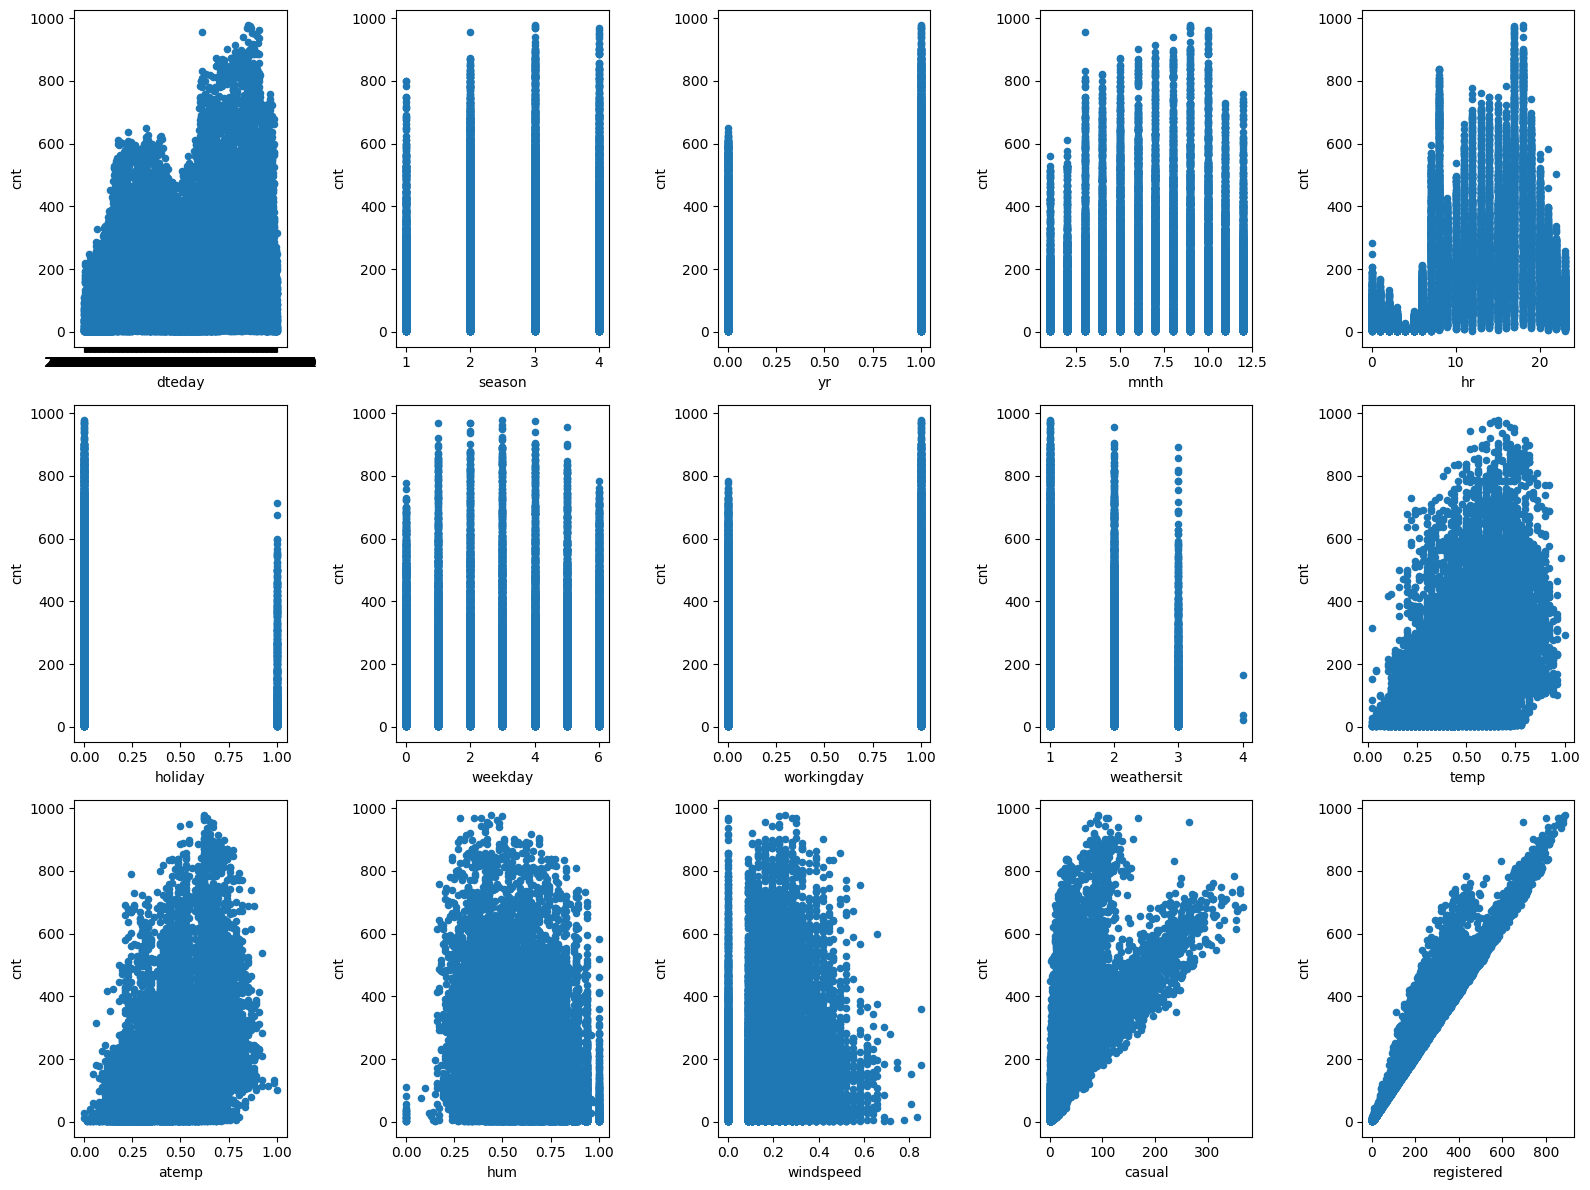

In [89]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(16, 12))
for idx, feature in enumerate(df.columns[1:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 5, idx % 5])

plt.tight_layout()

### 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?





ответ: Летом берут велосипеды чаще

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.



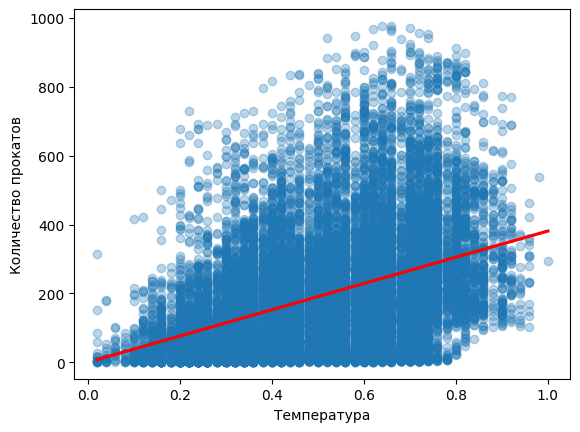

In [104]:
sns.regplot(x="temp", y="cnt", data=df, scatter_kws={"alpha": 0.3}, ci=None, line_kws={'color': 'red'})
plt.xlabel("Температура")
plt.ylabel("Количество прокатов")
plt.show()

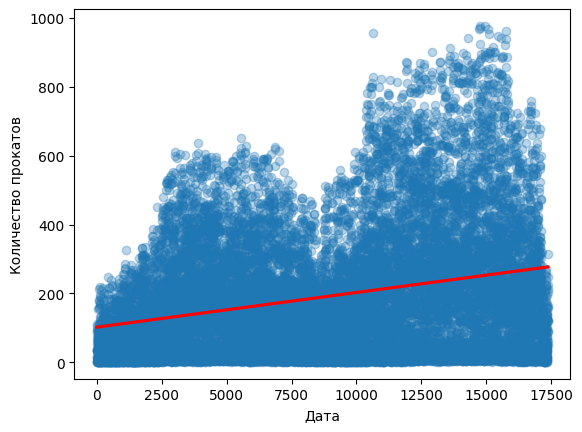

In [105]:
sns.regplot(x="instant", y="cnt", data=df, scatter_kws={"alpha": 0.3}, ci=None, line_kws={'color': 'red'})
plt.xlabel("Дата")
plt.ylabel("Количество прокатов")
plt.show()

Ответ:

1) В зависимости от температуры, чем больше температура, тем больше прокатов

2) Чем больше времени проходит, тем больше становится прокатов

### 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.



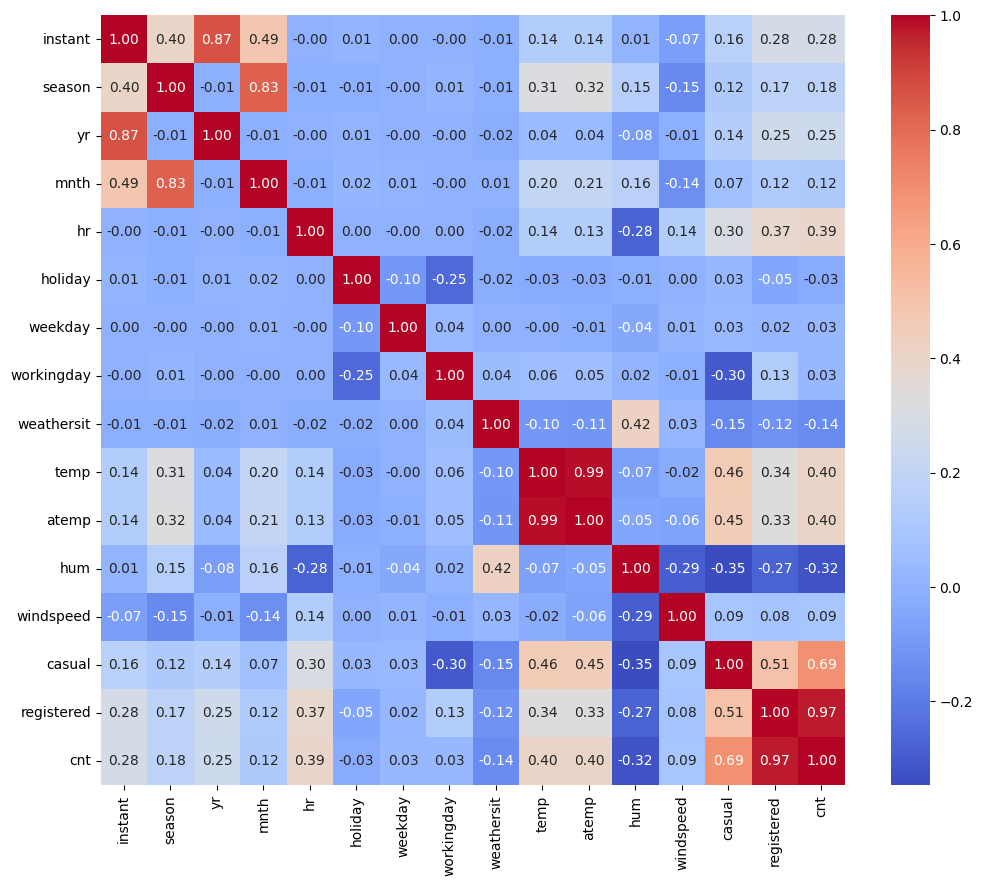

In [9]:
corr_matrix = df.corr(numeric_only=True)

lt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.show()

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ: Влажность, Погода, Праздник ли в этот день, день недели

### 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)



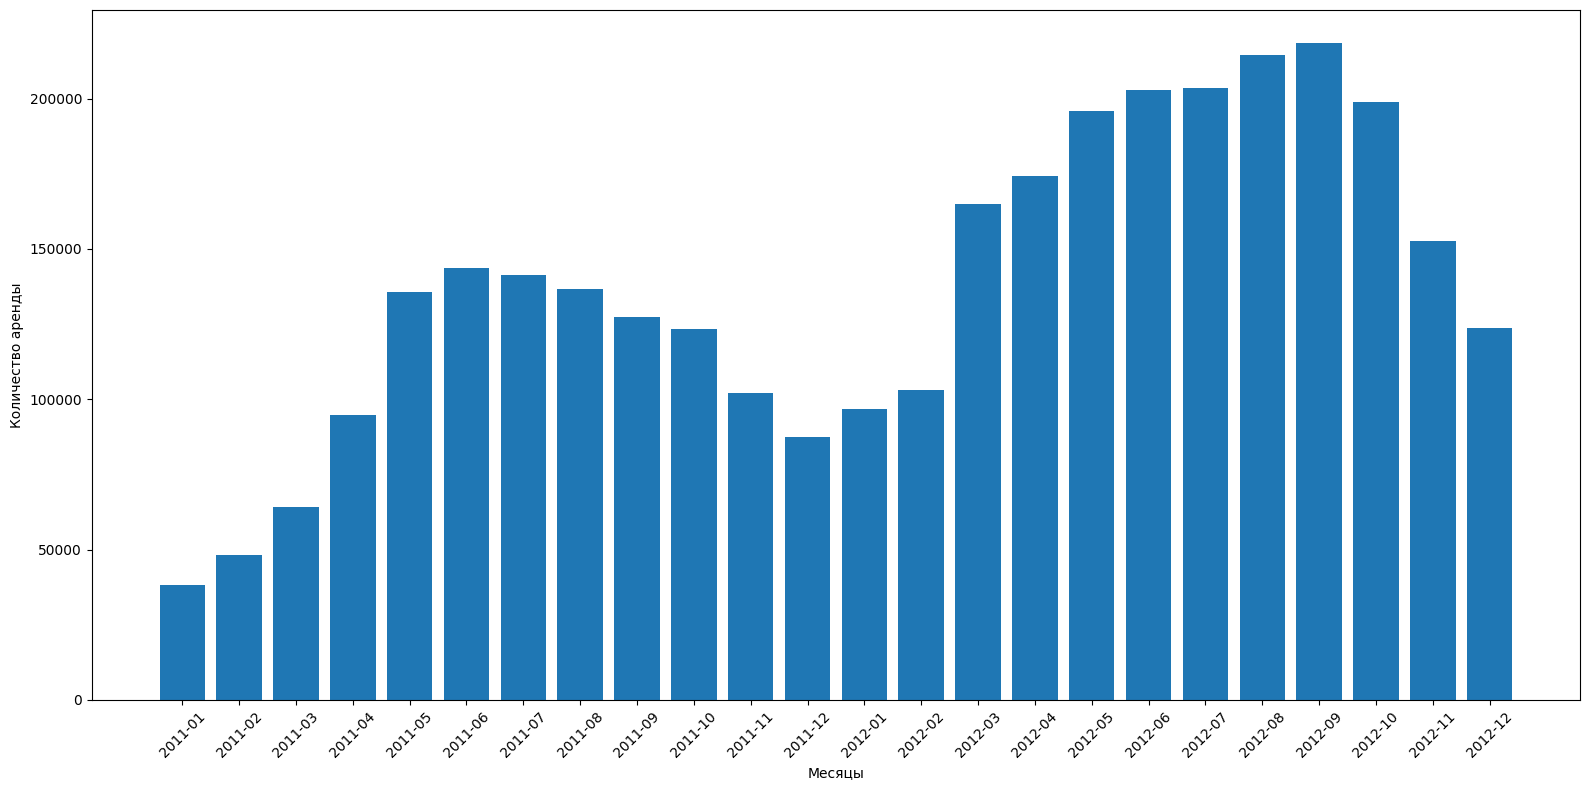

In [20]:
grouped_data = df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

grouped_data['year_month'] = grouped_data['yr'].astype(str) + '-' + grouped_data['mnth'].astype(str).str.zfill(2)

grouped_data = grouped_data.sort_values(['yr', 'mnth'])

total_rides = grouped_data['cnt'].tolist()

x_axis = grouped_data['year_month'].tolist()

plt.figure(figsize=(16, 8))
plt.bar(x_axis, total_rides)
plt.xlabel('Месяцы')
plt.ylabel('Количество аренды')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: Со временем прокаты велосипедов стали брать чаще

### 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,



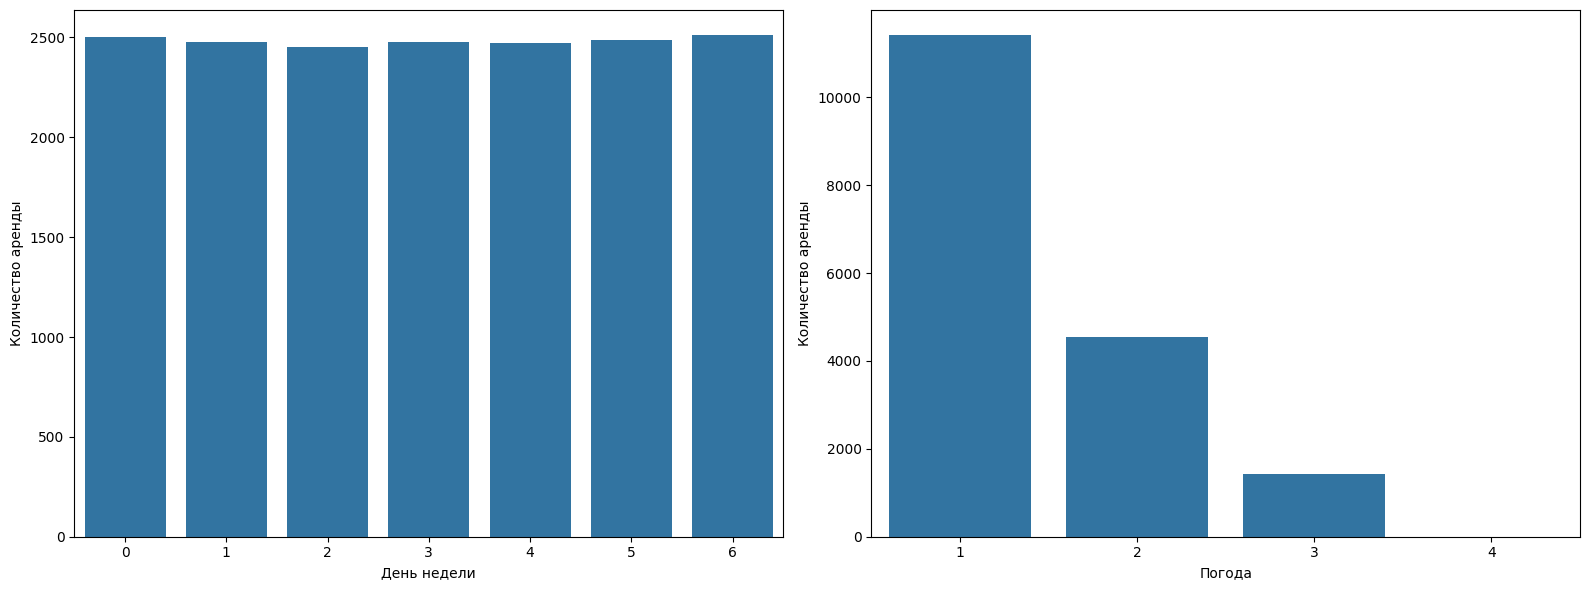

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x='weekday', data=df, ax=axes[0])
axes[0].set_xlabel('День недели')
axes[0].set_ylabel('Количество аренды')


sns.countplot(x='weathersit', data=df, ax=axes[1])
axes[1].set_xlabel('Погода')
axes[1].set_ylabel('Количество аренды')


plt.tight_layout()
plt.show()

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.



Ответ: Велосипеды брались чаще в хорошую погоду и при плохой погоде аренды нет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?


Ответ: равномерное распределение

### 5. Распределение

Постройте распределение целевого признака.


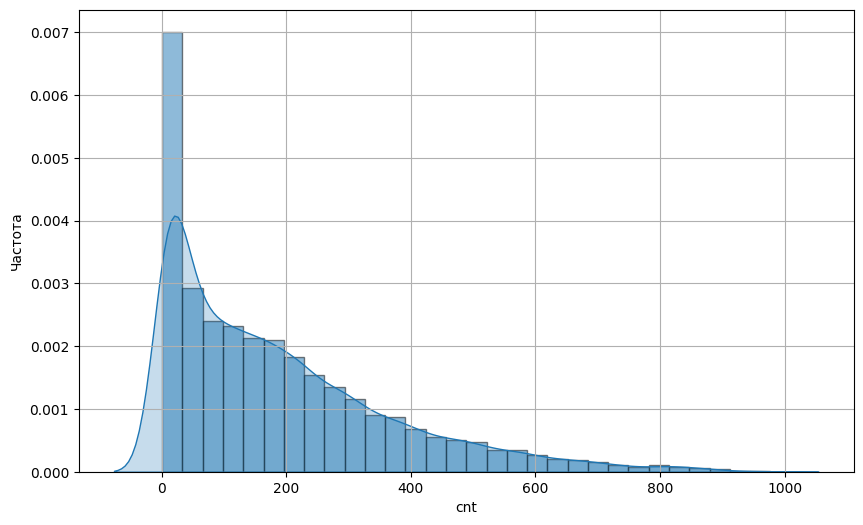

189.46308763450142

In [34]:
plt.figure(figsize=(10, 6))

plt.hist(df['cnt'], bins=30, edgecolor='black', alpha=0.5, density=True)

sns.kdeplot(df['cnt'], fill=True)

plt.xlabel('cnt')
plt.ylabel('Частота')
plt.grid(True)
plt.show()



**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

Ответ: 180-200

### 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.



<Figure size 1000x800 with 0 Axes>

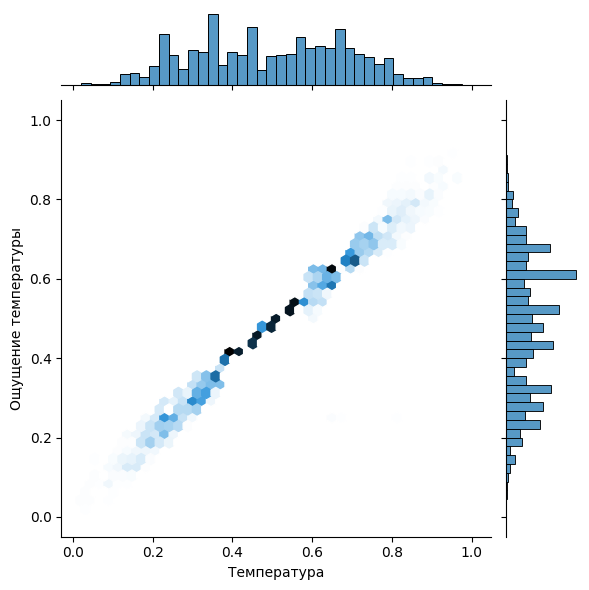

In [48]:
plt.figure(figsize=(10, 8))
sns.jointplot(data=df, x='temp', y='atemp', kind='hex')


plt.xlabel('Температура')
plt.ylabel('Ощущение температуры')


plt.show()

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: В принципе соотношение температуры и ощущения примерно должны быть одинаковые

### 7. Боксплот (ящик с усами)

Постройте график распределения (боксплот) количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.




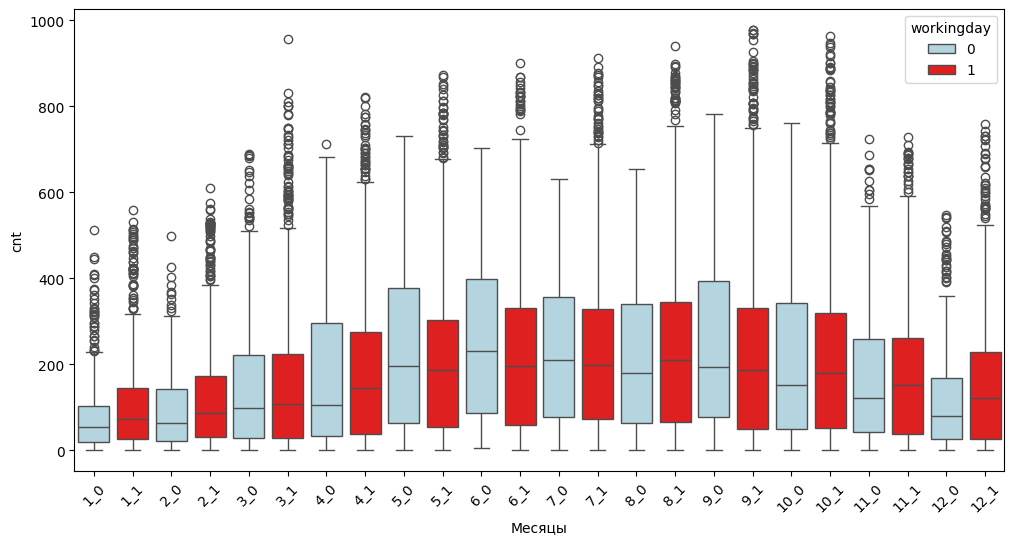

In [65]:
df['month_workday'] = df['mnth'].astype(str) + '_' + df['workingday'].astype(str)

plt.figure(figsize=(12, 6))
sns.boxplot(
    x='month_workday',
    y='cnt',
    hue='workingday',
    data=df,
    order=sorted(
        df['month_workday'].unique(),
        key=lambda x: (
            int(x.split('_')[0]), int(x.split('_')[1])
            )
        ),
    palette=['lightblue', 'red'])

plt.xlabel('Месяцы')
plt.ylabel('cnt')

plt.xticks(rotation=45)

plt.show()

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.

Ответ: В будние дни берутся чаще в холодное время года, а в выходные берутся чаще в теплое время

Возможно в холодное время года в выходные предпочитают, проводить досуг не используя прокат велосипедов, и используют его только для того, чтобы добраться до работы в будние дни, и собственно в летнее время погода больше распологает для проката велосипеда, как проведение досуга в выходные дни

## Комплексное задание №3. Визуальный анализ данных. Часть 2

In [1]:
!pip install seaborn==0.11.0
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
colab = True # если работаете на своём компьютере, в локальной среде, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


В этом задании Вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams.

Исходные данные загрузите самостоятельно!

In [5]:
if colab:
    df = pd.read_csv('/content/drive/My Drive/StudentsPerformance.csv')
else:
    df = pd.read_csv("../../StudentsPerformance.csv")

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Ход задания:

#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


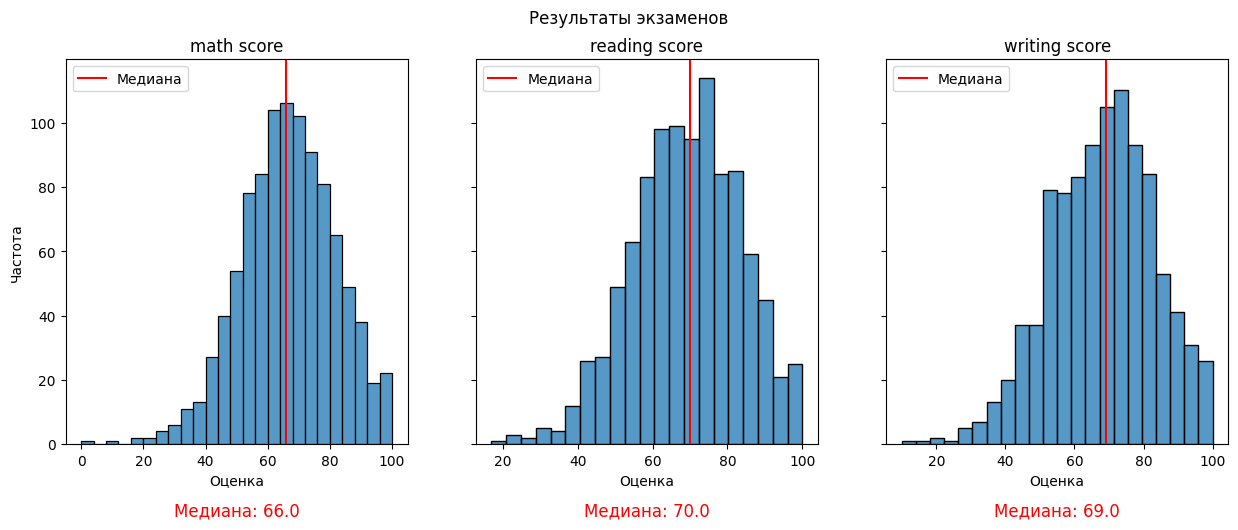

In [11]:
exam_cols = ['math score', 'reading score', 'writing score']

medians = df[exam_cols].median()

fig, axs = plt.subplots(ncols=3, figsize=(15, 5), sharey=True)
fig.suptitle('Результаты экзаменов')

for i, col in enumerate(exam_cols):
    sns.histplot(data=df, x=col, kde=False, ax=axs[i])
    axs[i].set_title(col)
    axs[i].set_xlabel('Оценка')
    axs[i].set_ylabel('Частота')
    axs[i].axvline(medians[col], color='red',  label='Медиана')
    axs[i].legend()
    axs[i].text(0.5, -0.15,
                f'Медиана: {medians[col]:.1f}',
                transform=axs[i].transAxes,
                ha='center',
                va='top',
                fontsize=12,
                color='red'
                )

plt.show()

#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню?

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


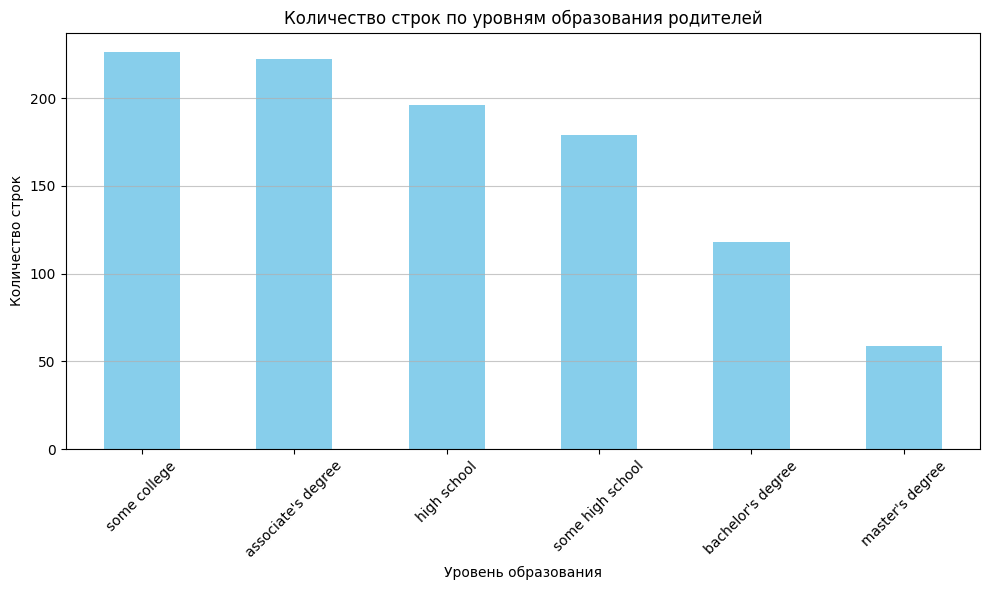

Уровни образования и количество строк:
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


In [15]:
education_counts = df['parental level of education'].value_counts()

plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar', color='skyblue')
plt.title('Количество строк по уровням образования родителей')
plt.xlabel('Уровень образования')
plt.ylabel('Количество строк')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

print("Уровни образования и количество строк:")
print(education_counts)

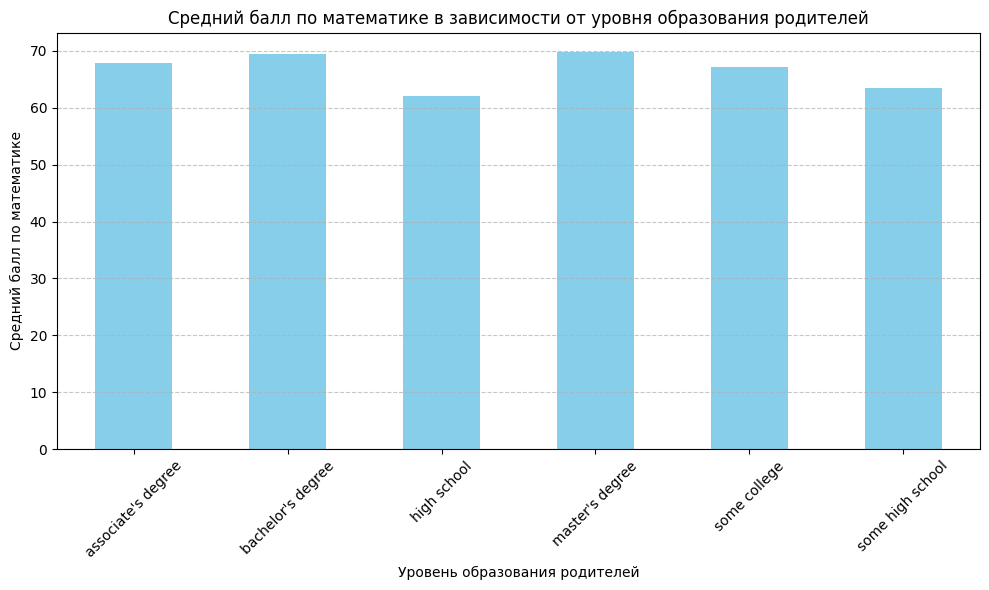

In [14]:
math_scores_by_parental_education = df.groupby('parental level of education')['math score'].mean()

plt.figure(figsize=(10, 6))
math_scores_by_parental_education.plot(kind='bar', color='skyblue')
plt.title('Средний балл по математике в зависимости от уровня образования родителей')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Средний балл по математике')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Примерно баллы распределены от 60 до 70, уровень образования родителей не влияет на оценки детей

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [16]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

num_students_over_90 = len(df[(df['gender'] == 'female') & (df['total_score'] > 270)])

print("Число студенток, набравших более 90 баллов по всем предметам:", num_students_over_90)

Число студенток, набравших более 90 баллов по всем предметам: 36


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение


In [18]:
scores_comparison = df.groupby('gender').agg({'math score': ['min', 'max', 'median'],
                                              'reading score': ['min', 'max', 'median'],
                                              'writing score': ['min', 'max', 'median']})

print("Сравнение баллов у студентов разных полов:")
scores_comparison

Сравнение баллов у студентов разных полов:


math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100   65.0            17  100   73.0            10  100   
male           27  100   69.0            23  100   66.0            15  100   

               
       median  
gender         
female   74.0  
male     64.0

#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола
###### (подсказка: используете  [pd.agg()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html))

In [20]:
mean_scores_by_gender_lunch_prep = df.groupby(['gender', 'lunch', 'test preparation course']).agg({
    'math score': 'mean',
    'reading score': 'mean',
    'writing score': 'mean'
})

print("Средний балл студентов разного пола в зависимости от обеда и подготовки к тесту:")
mean_scores_by_gender_lunch_prep

Средний балл студентов разного пола в зависимости от обеда и подготовки к тесту:


math score  reading score  \
gender lunch        test preparation course                              
female free/reduced completed                 60.785714      73.428571   
                    none                      52.890756      63.831933   
       standard     completed                 71.131579      79.798246   
                    none                      66.530233      73.386047   
male   free/reduced completed                 65.639344      65.786885   
                    none                      60.609524      59.076190   
       standard     completed                 75.955752      72.601770   
                    none                      69.832512      64.719212   

                                             writing score  
gender lunch        test preparation course                 
female free/reduced completed                    74.371429  
                    none                         61.781513  
       standard     completed                    81.508772  
                    none                         72.967442  
male   free/reduced completed                    65.737705  
                    none                         55.285714  
       standard     completed                    71.982301  
                    none                         61.906404

Если студент поел и прошел подготовительный курс, он лучше сдаст экзамен

#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы

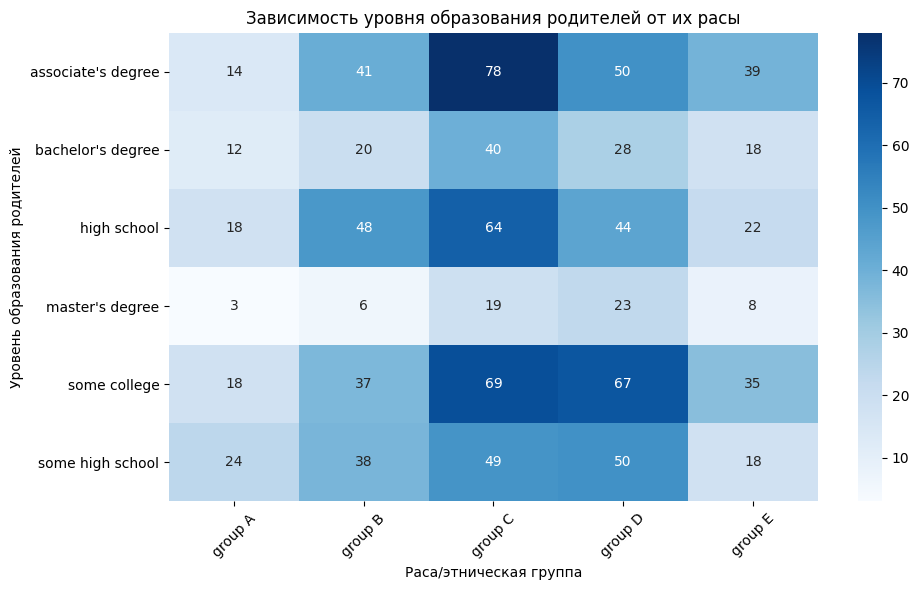

In [21]:
cross_table = pd.crosstab(df['parental level of education'], df['race/ethnicity'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_table, annot=True, cmap="Blues", fmt='d')
plt.title('Зависимость уровня образования родителей от их расы')
plt.xlabel('Раса/этническая группа')
plt.ylabel('Уровень образования родителей')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

Дети, чьи родители получили степень бакалавра/магистра, чаще ходят на курсы

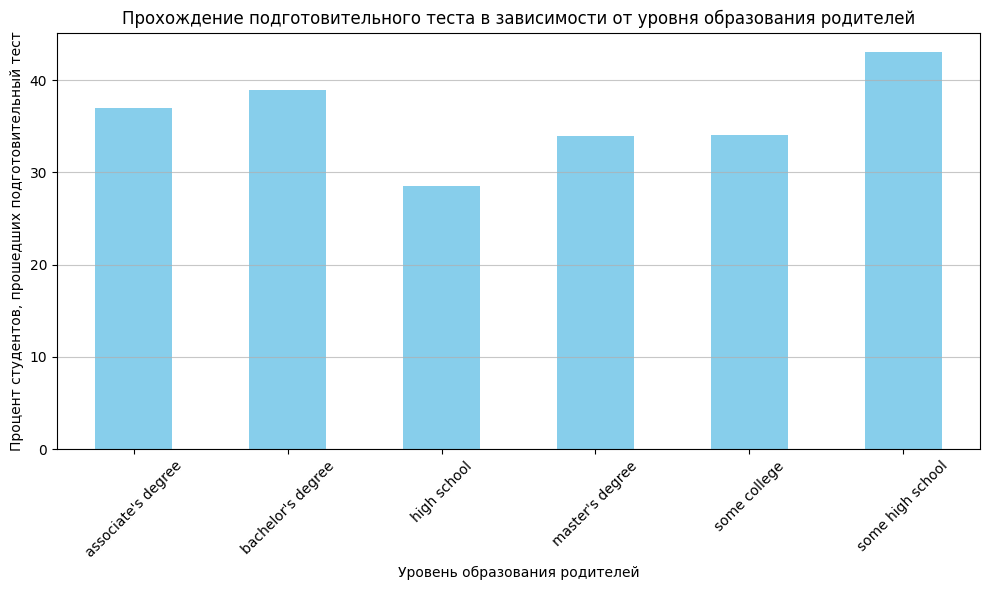

In [23]:
prep_course_by_education = df.groupby('parental level of education')['test preparation course'].apply(lambda x: (x == 'completed').mean() * 100)

plt.figure(figsize=(10, 6))
prep_course_by_education.plot(kind='bar', color='skyblue')
plt.title('Прохождение подготовительного теста в зависимости от уровня образования родителей')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Процент студентов, прошедших подготовительный тест')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

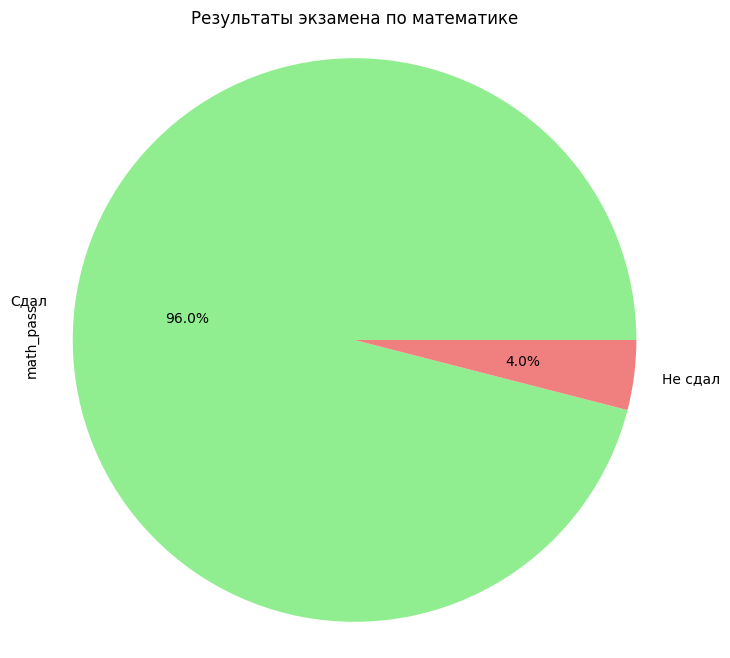

In [28]:
df['math_pass'] = df['math score'] >= 40

math_pass_counts = df['math_pass'].value_counts()

plt.figure(figsize=(8, 8))
math_pass_counts.plot.pie(
    autopct='%1.1f%%',
    colors=['lightgreen', 'lightcoral'],
    labels=['Сдал', 'Не сдал']
    )
plt.title('Результаты экзамена по математике')
plt.axis('equal')
plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

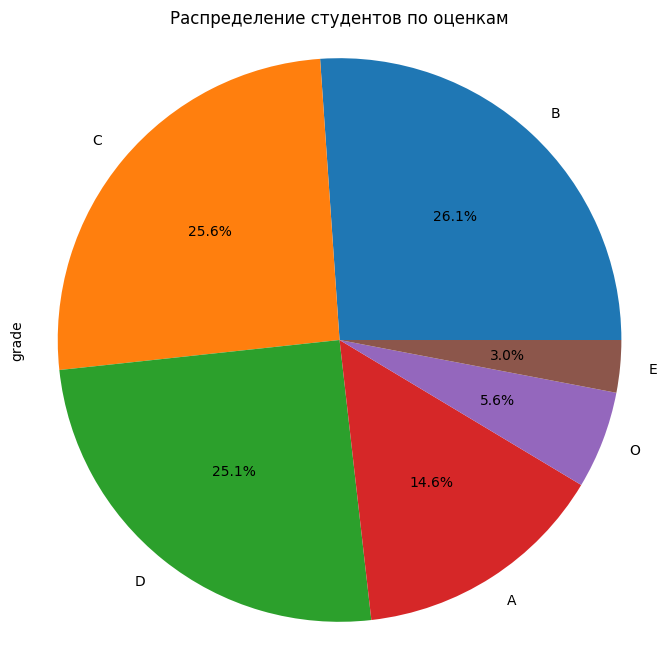

In [30]:
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

def get_grade(score):
    if score < 40:
        return 'E'
    elif 41 <= score < 60:
        return 'D'
    elif 60 <= score < 70:
        return 'C'
    elif 70 <= score < 80:
        return 'B'
    elif 80 <= score < 90:
        return 'A'
    else:
        return 'O'

df['grade'] = df['average_score'].apply(get_grade)

grade_counts = df['grade'].value_counts()

plt.figure(figsize=(8, 8))
grade_counts.plot.pie(autopct='%1.1f%%')
plt.title('Распределение студентов по оценкам')
plt.axis('equal')
plt.show()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

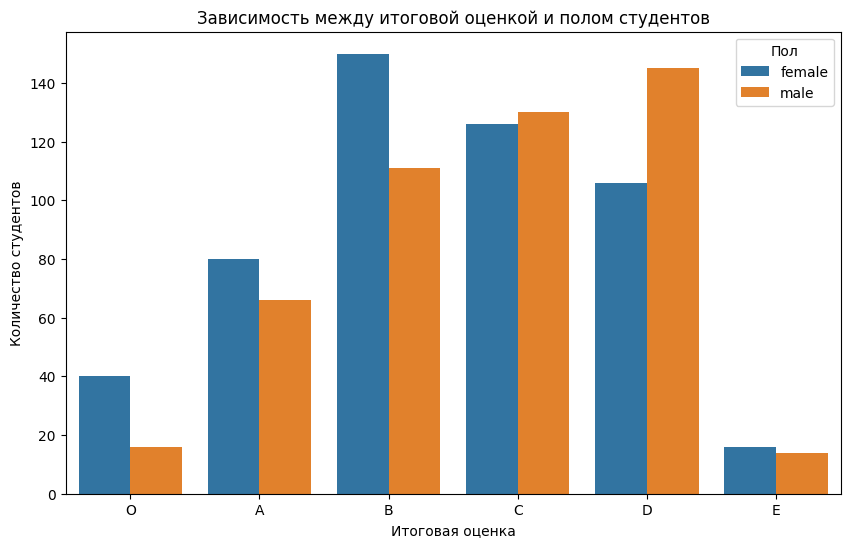

In [31]:
df['grade'] = df['average_score'].apply(get_grade)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='grade', hue='gender', order=['O', 'A', 'B', 'C', 'D', 'E'])
plt.title('Зависимость между итоговой оценкой и полом студентов')
plt.xlabel('Итоговая оценка')
plt.ylabel('Количество студентов')
plt.legend(title='Пол')
plt.show()